In [625]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from openpyxl import load_workbook

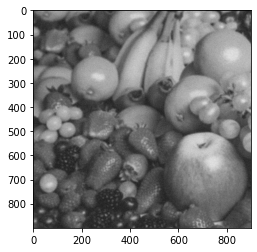

In [626]:
#(a)original
img = cv2.imread("./fruit blurred-noisy.tif", 0)
# normalize float versions
norm_img1 = cv2.normalize(img, None, alpha=0,beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)
# scale to uint8
norm_img1 = (255*norm_img1).astype(np.uint8)
plt.imshow(norm_img1,cmap='gray')
plt.show()

norm_img = Image.fromarray(norm_img1)
norm_img.save('output/(a)original.tif',dpi=(200.0,200.0))


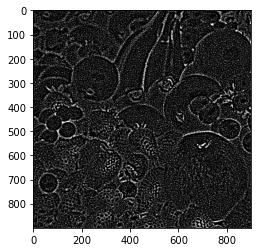

In [627]:
#(b)Laplacian
#blur = cv2.medianBlur(norm_img1, 3)
blur = cv2.boxFilter(norm_img1,-1,(5,5),normalize=True)
gray_lap = cv2.Laplacian(blur,-1, ksize=5)   
Laplacian = cv2.convertScaleAbs(gray_lap) 
plt.imshow(Laplacian,cmap='gray')
plt.show()
#cv2.imwrite('output/(b)Laplacian.tif', Laplacian)

laplacian = Image.fromarray(Laplacian)
laplacian.save('output/(b)Laplacian.tif',dpi=(200.0,200.0))



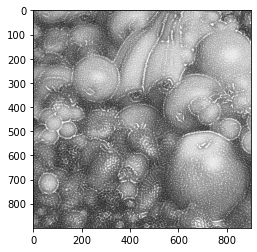

In [628]:
#(c)Laplacian-sharpened
Laplacian_sharpened = cv2.add(Laplacian, norm_img1)
plt.imshow(Laplacian_sharpened,cmap='gray')
plt.show()
#cv2.imwrite('output/(c)Laplacian-sharpened.tif', Laplacian_sharpened)

laplacian_sharpened = Image.fromarray(Laplacian_sharpened)
laplacian_sharpened.save('output/(c)Laplacian-sharpened.tif',dpi=(200.0,200.0))

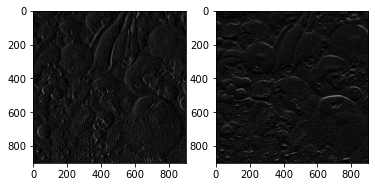

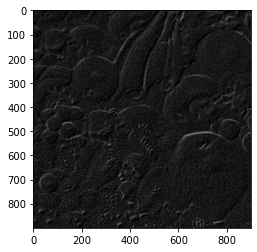

In [629]:
#(d)Sobel-gradient
x = cv2.Sobel(norm_img1, -1, 1, 0, ksize=3) 
y = cv2.Sobel(norm_img1, -1, 0, 1, ksize=3)
absX = cv2.convertScaleAbs(x)    # 轉換為影像原本儲存的格式 uint8
absY = cv2.convertScaleAbs(y)

Sobel_gradient = cv2.addWeighted(absX, 0.5, absY,0.5,0) 

plt.subplot(121)
plt.imshow(absX,cmap='gray')
plt.subplot(122)
plt.imshow(absY,cmap='gray')
plt.show()
plt.imshow(Sobel_gradient,cmap='gray')
plt.show()
cv2.imwrite('output/(d)Sobel-gradient.tif', Sobel_gradient )

sobel_gradient = Image.fromarray(Sobel_gradient)
sobel_gradient.save('output/(d)Sobel-gradient.tif',dpi=(200.0,200.0))

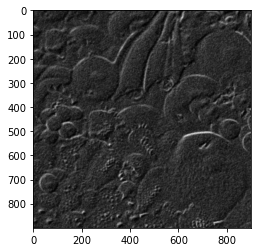

In [630]:
# (e)smoothed gradient

smooth_gradient = cv2.boxFilter(Sobel_gradient, -1, (5,5), normalize=True)
plt.imshow(smooth_gradient,cmap='gray')
plt.show()
#cv2.imwrite('output/(e)smoothed gradient.tif', smooth_gradient)

Smooth_gradient = Image.fromarray(smooth_gradient)
Smooth_gradient.save('output/(e)smoothed gradient.tif',dpi=(200.0,200.0))

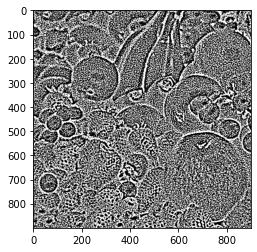

In [631]:
# (f)extracted feature
ext = cv2.multiply(smooth_gradient ,Laplacian)
#ext = smooth_gradient * Laplacian
plt.imshow(ext,cmap='gray')
plt.show()
#cv2.imwrite('output/(f)extracted feature.tif', ext)

Ext = Image.fromarray(ext)
Ext.save('output/(f)extracted feature.tif',dpi=(200.0,200.0))


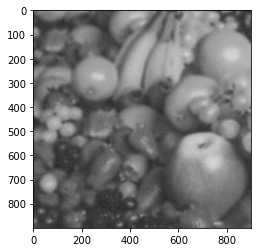

In [632]:
# (g)
c = 0.9
g_img  = cv2.addWeighted(norm_img1, c, ext, 1-c, 0)
plt.imshow(g_img,cmap='gray')
plt.show()
#cv2.imwrite('output/(g)=(a)+(f).tif', g_img)

G_img = Image.fromarray(g_img)
G_img.save('output/(g)=(a)+(f).tif',dpi=(200.0,200.0))

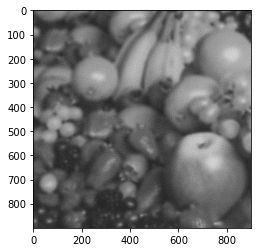

In [633]:
#(h)final
gamma = 1.1
h_img = np.array(255*(g_img/255)**gamma,dtype='uint8')
plt.imshow(h_img,cmap='gray')
plt.show()

H_img = Image.fromarray(h_img)
H_img.save('output/(h)final.tif',dpi=(200.0,200.0))

(256, 1)


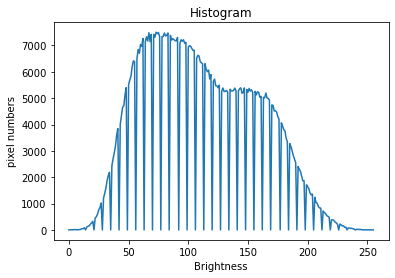

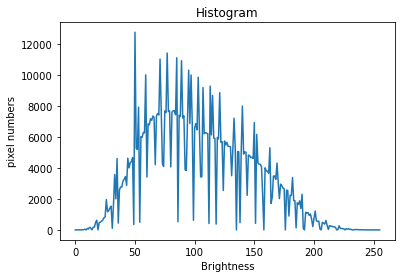

In [634]:
#histogram
hist = cv2.calcHist([norm_img1], [0], None, [256], [0, 256]) #cv2.calcHist(影像, 通道, 遮罩, 區間數量, 數值範圍)
hist2 = cv2.calcHist([h_img], [0], None, [256], [0, 256])
print(hist.shape)

plt.title("Histogram")
plt.xlabel("Brightness")
plt.ylabel("pixel numbers")
plt.plot(hist)  
plt.show()

plt.title("Histogram")
plt.xlabel("Brightness")
plt.ylabel("pixel numbers")
plt.plot(hist2)  
plt.show()

In [635]:
#將資料寫入excel
wb = load_workbook("Histograms.xlsx")
print(wb.sheetnames)
sheet = wb.worksheets[0]  #抓出列數
print("row: {}, column: {}".format(sheet.max_row, sheet.max_column))

for i in range(2, sheet.max_row+1):
    sheet.cell(row = i, column = 4, value = hist[i-2][0])
    sheet.cell(row = i, column = 5, value = hist2[i-2][0])

wb.save("Histograms.xlsx")



['histograms']
row: 257, column: 5
